<a href="https://colab.research.google.com/github/Soumyasriau/Week-1/blob/main/week1_garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
asdasdasasdas_garbage_classification_path = kagglehub.dataset_download('asdasdasasdas/garbage-classification')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal19.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal76.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal346.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal122.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal353.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal98.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal251.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal92.jpg
/kaggle/input/garbage-classification/Garbage classification/Garbage classification/metal/metal268.jpg
/kaggle/input/garbage-classificatio

# Import necessary libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# Set directories and parameters


In [ ]:
data_dir = "/kaggle/input/garbage-classification/Garbage classification/Garbage classification"
img_size = (150, 150)
batch_size = 32
epochs = 10


# Data Augmentation and Preprocessing


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% training, 20% validation
)

# Create training and validation generators


In [ ]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


# Build the CNN model


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



# Train the model


In [10]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6962 - loss: 0.8440 - val_accuracy: 0.5427 - val_loss: 1.2408
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.7400 - loss: 0.6992 - val_accuracy: 0.5447 - val_loss: 1.3668
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7520 - loss: 0.6692 - val_accuracy: 0.5467 - val_loss: 1.4794
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7885 - loss: 0.5830 - val_accuracy: 0.5646 - val_loss: 1.2978
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.8190 - loss: 0.4827 - val_accuracy: 0.5547 - val_loss: 1.7093
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8848 - loss: 0.3447 - val_accuracy: 0.5328 - val_loss: 1.6968
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.8941 - loss: 0.3236 - val_accuracy: 0.5288 - val_loss: 1.7932
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9151 - loss: 0.2520 - val_accuracy: 0.5527 - v

# Evaluate the model


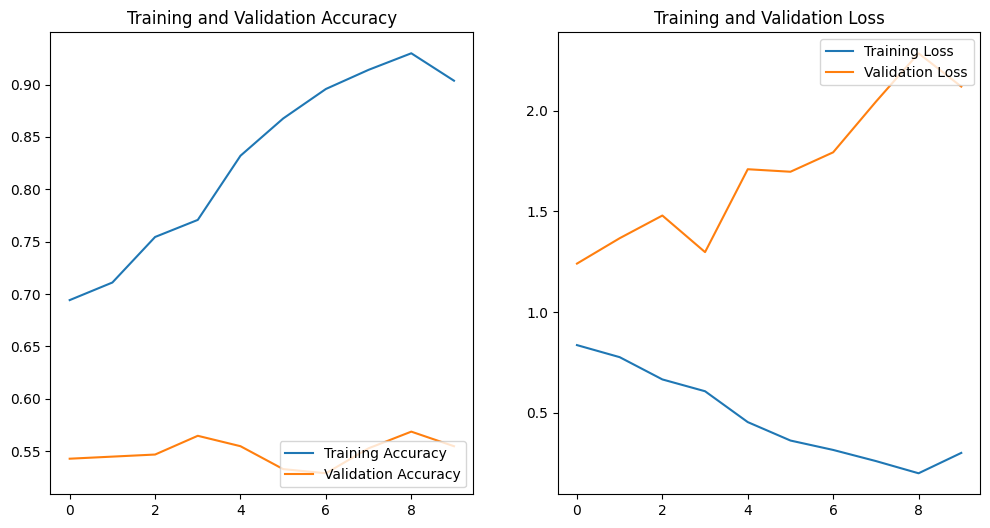

In [11]:
# Plot training & validation accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# Evaluate the model


In [12]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 550ms/step - accuracy: 0.5527 - loss: 2.2487
Validation Accuracy: 0.5546719431877136
